In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler	
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import SGDClassifier

## Cardivascular disease


In this report, cardiovascular disease is the primary focus, with the objective of developing an AI system capable of predicting the presence of cardiovascular disease in individuals. This involves filtering, manipulating, and removing data to appropriately fit it into an AI model. While creating an AI bot for cardiovascular disease prediction, it is necessary that the training data is precise, given the critical nature of the issue, which involves human health. The trained AI must, at a minimum avoid producing any false positives. A false positive prediction incorrectly indicating that an individual does not have cardiovascular disease when they actually do could have serious implications. but a false negative suggesting that an individual has cardiovascular disease when they do not while still concerning, leads to further testing that can clarify the individual’s health status

In [7]:
df_cardio_disease = pd.read_csv("../data_AI/cardio_train.csv", delimiter=';')

ohe=OneHotEncoder()
le = LabelEncoder()

positive_cardio = df_cardio_disease['cardio'].sum()
negative_cardio = len(df_cardio_disease) - positive_cardio
all_cardio = len(df_cardio_disease)

print(f"There is", {positive_cardio}, "positive and", {negative_cardio},"negative cardio cases, total of:", {all_cardio}, "Persons tested")


There is {34979} positive and {35021} negative cardio cases, total of: {70000} Persons tested


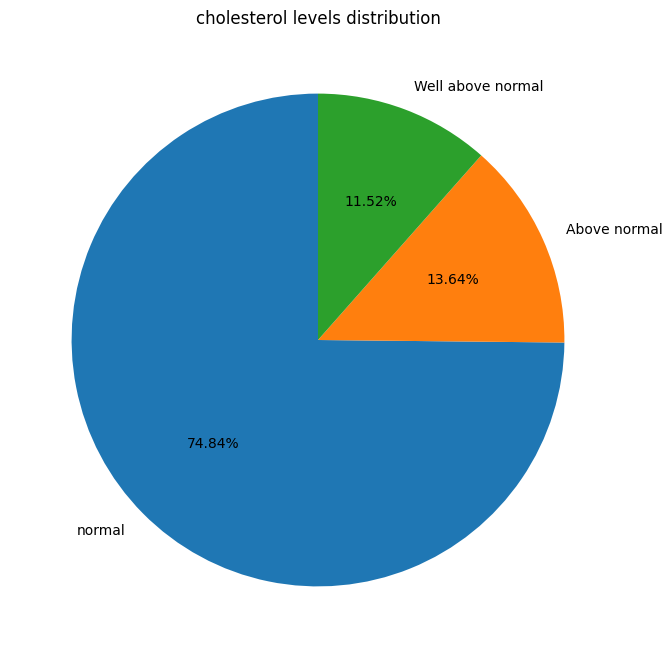

In [8]:
cholestorol_counts = df_cardio_disease['cholesterol'].value_counts()

plt.figure(figsize=(12, 8))
cholestorol_counts.plot.pie(autopct='%2.2f%%', startangle=90, labels=['normal', 'Above normal', 'Well above normal'])
plt.title('cholesterol levels distribution')
plt.ylabel('')
plt.show()

* Only 25% of the population have a higher cholesterol while 50% have cardiovascular disease.

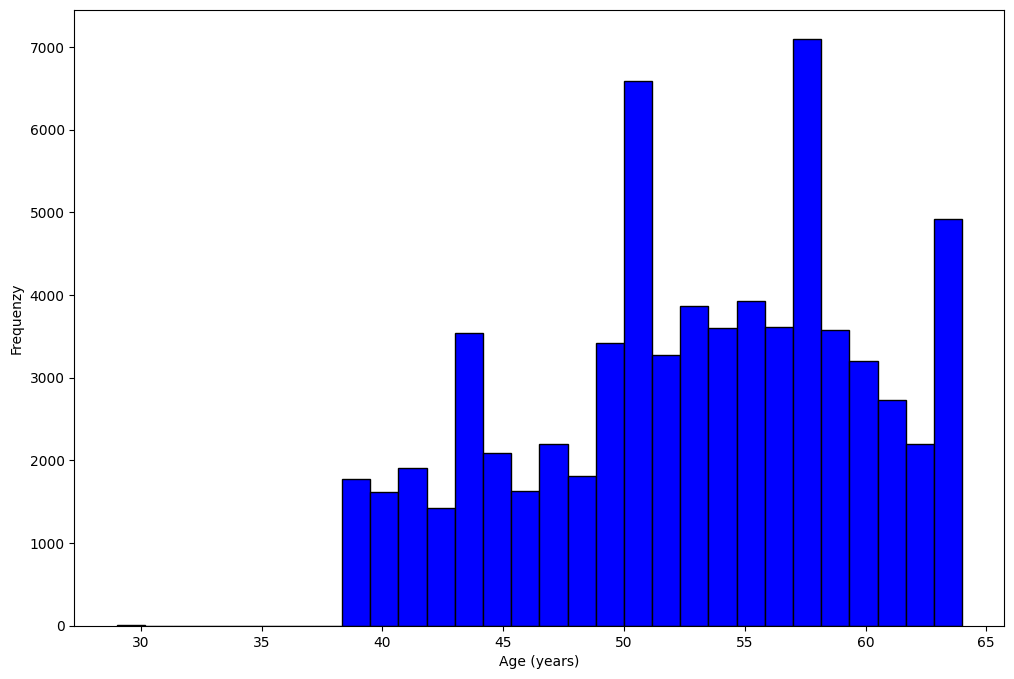

In [9]:
ages = df_cardio_disease['age'].floordiv(365)

plt.figure(figsize=(12, 8))
plt.hist(ages, bins=30, color='blue', edgecolor='black')
plt.ylabel('Frequenzy')
plt.xlabel('Age (years)')
plt.show()

* Good range of age distrubation to form a better and more accuarate results

In [10]:
smoker = df_cardio_disease['smoke'].sum()
procentage_of_smokers = (smoker / len(df_cardio_disease['smoke'])) * 100

print(f"The % of smokers is, {procentage_of_smokers:.2f}%")

The % of smokers is, 8.81%


<function matplotlib.pyplot.show(close=None, block=None)>

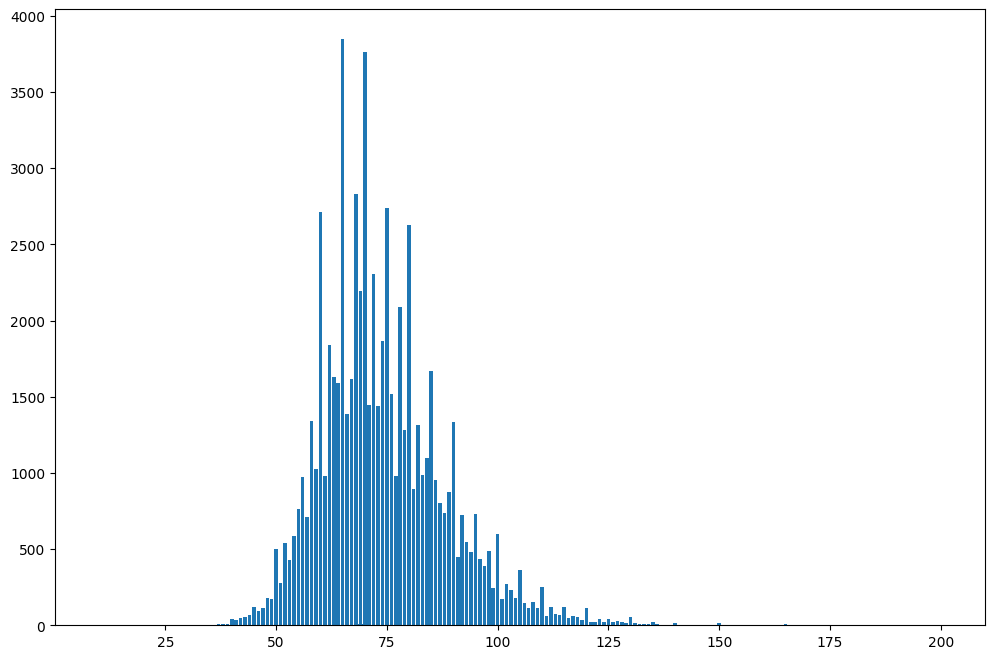

In [11]:
weight = df_cardio_disease['weight']
weight_counts = weight.value_counts()


plt.figure(figsize=(12, 8))
plt.bar(weight_counts.index, weight_counts.values)
plt.show

* Good distrubutions of weight

In [12]:
women = ((df_cardio_disease["gender"] == 1) & (df_cardio_disease['cardio'])).sum()
men = ((df_cardio_disease["gender"] == 2) & (df_cardio_disease['cardio'])).sum()

print(f"There is", {women}, "women and", {men}, "men with cardiovascular disease")

There is {22616} women and {12363} men with cardiovascular disease


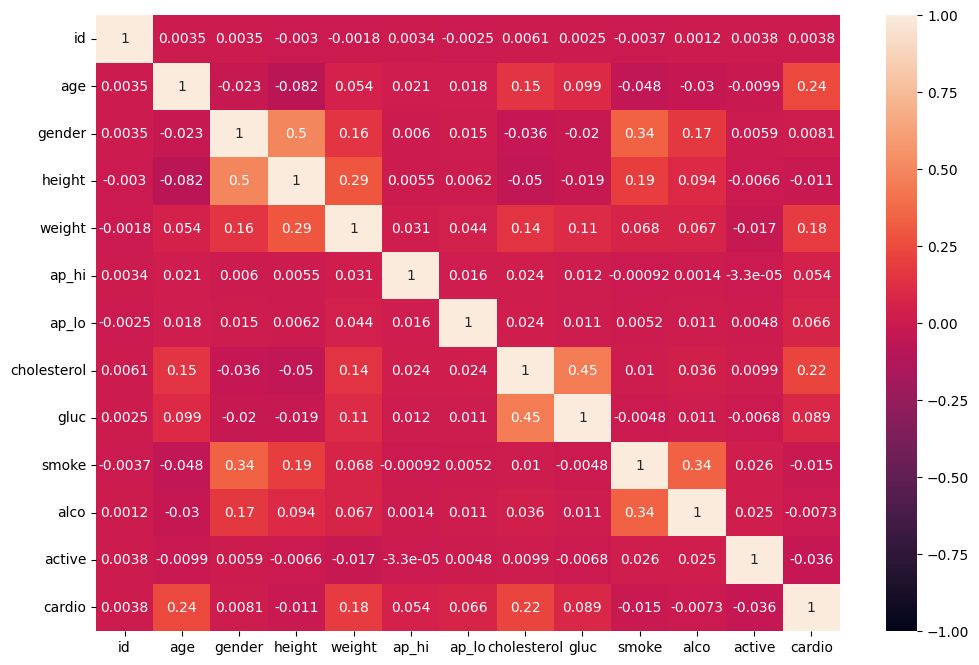

In [13]:
corr_cardio_disease = df_cardio_disease.corr()

plt.figure(figsize=(12,8))
heatmap = sns.heatmap(data=corr_cardio_disease, vmax=1, vmin=-1, annot=True)

The correlation heatmap presents an overview of the relationships between different variables within the dataset. Although there are some correlations present, they are not strong most values are around zero, suggesting no correlations. This observation underscores the need for data manipulation to unveil more significant correlations and to remove any data that may disrupt the results. Identifying and extracting relevant patterns from the data is crucial to enhance the predictive accuracy of the AI model for cardiovascular disease.

In [14]:
height_in_m = df_cardio_disease["height"] / 100
bmi = df_cardio_disease['weight'] / (height_in_m**2)

* BMI was added to the data set

In [15]:
df_cardio_disease['gender'] = le.fit_transform(df_cardio_disease["gender"])
df_cardio_disease["BMI"] = bmi

df_cardio_disease = df_cardio_disease.query("ap_lo >= 50 and ap_lo <= 120 and ap_hi >= 80 and ap_hi <= 220 and BMI <= 75")

* Outliers within the columns for ap_high, ap_low, and BMI were removed from the dataset.

In [16]:
one_hot_chol = ohe.fit_transform(df_cardio_disease['cholesterol'].values.reshape(len(df_cardio_disease['cholesterol']), 1)).toarray()
one_hot_chol = one_hot_chol[:, 1:].astype(int)

df_one_hot_chol = pd.DataFrame(one_hot_chol, columns=['above normal chol', 'well above normal chol'])

In [17]:
one_hot_gluc = ohe.fit_transform(df_cardio_disease['gluc'].values.reshape(len(df_cardio_disease['gluc']), 1)).toarray()
one_hot_gluc = one_hot_gluc[:, 1:].astype(int)

df_one_hot_gluc = pd.DataFrame(one_hot_gluc, columns=['above normal gluc', 'well above normal gluc'])
df_cardio_disease['age'] = df_cardio_disease['age'].floordiv(365)
df_cardio_disease.drop(['weight', 'height', 'id'], axis=1, inplace=True)

In [18]:
df_cardio_disease.reset_index(inplace=True)
df_cardio_disease.drop(['index'], axis=1, inplace=True)

In [19]:
df = pd.concat([df_cardio_disease.iloc[:, :11], df_one_hot_chol, df_one_hot_gluc], axis=1)
df.drop(['cholesterol', 'gluc'], axis=1, inplace=True)

In [20]:
X = df_cardio_disease.drop('cardio', axis=1)
y = df_cardio_disease['cardio']

sc = StandardScaler()
X = sc.fit_transform(X)

To ensure the effectiveness of the predictive model, standardizing the features is an important step. feature scaling  is accomplished by using StandardScaler. It adjusts the features to have a mean of zero and a standard deviation of one, normalizing their scale without alter  the differences in the range of values.  isolated the target variable 'cardio' into the variable 'y', which represents the presence or absence of cardiovascular disease. The remaining features are stored in 'X'. After applying StandardScaler, each feature in 'X' will contribute equally to the distance computations in the model, preventing any single feature with a large range from dominating the model's behavior.

<Axes: >

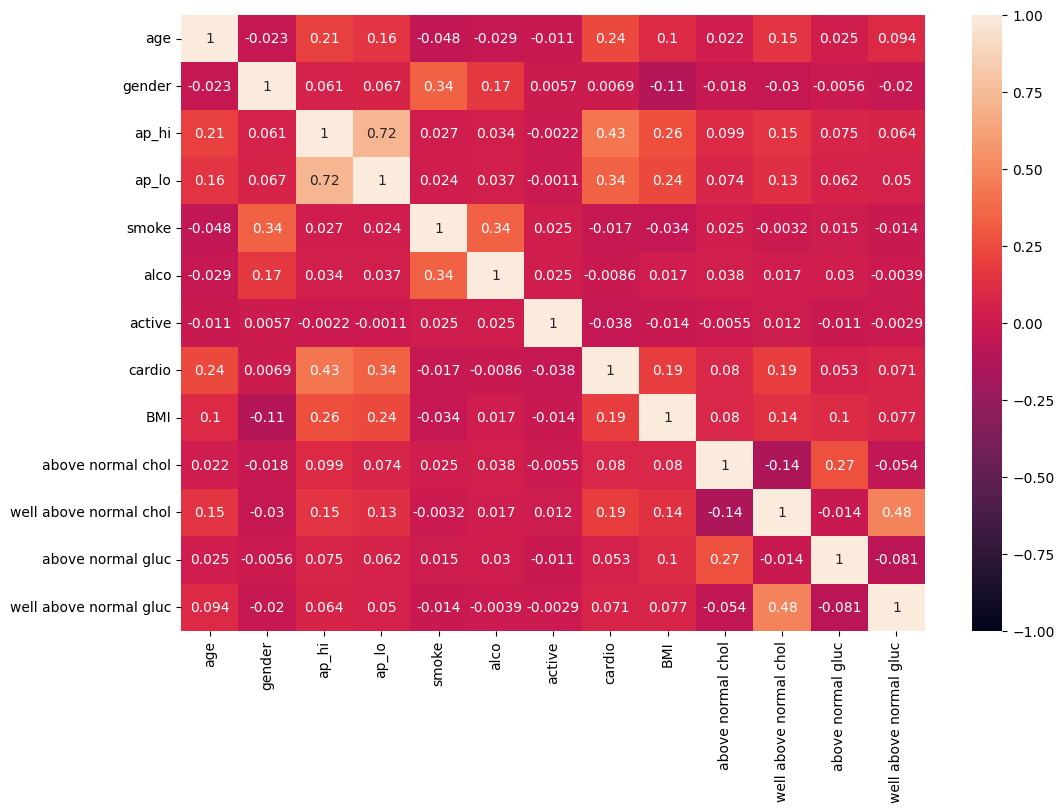

In [21]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1)

in the updated correlation heatmap, some modest improvements in correlation strength can be observed. The heatmap suggests a slightly better overall correlation when compared to previous correlation heatmap. particularly with variables such as BMI, which shows a moderate positive correlation with the presence of cardiovascular disease (cardio). These insights are important as they can guide further data preparation and feature selection efforts to refine the AI model’s predictive capability.

In [22]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=62)

In [23]:
model_knn=KNeighborsClassifier(n_neighbors=50)
model_log=LogisticRegression()
model_SVC=SVC(kernel="rbf",C=1)
model_randforest=RandomForestClassifier(n_estimators=500)
SGD_model=SGDClassifier()

test_1=("knn",model_knn)
test_2=("lgr",model_log)
test_3=("svm",model_SVC)
test_4=("rf",model_randforest)
test_5=("SGD",SGD_model)

in the analysis, multiple different models were tested, including:

* Kneighborsclassifier 
* logistic regerssion 
* Support vector machine 
* RandomforestClassifer
* Stochastic Gradient Descent


Each of these models result have an approximate accuracy of 72%. While the performance metrics were similar, the differences in their strengths and weaknesses were shown. Some models may have higher precision, where  others might offer better recall. To use these differing attributes, a Voting Classifier was used. This ensemble technique combines the predictions from the individual models to form a better prediction, using  the 'best parts' of each model. this will result in a more robust and accurate model, often outperforming any single model. 

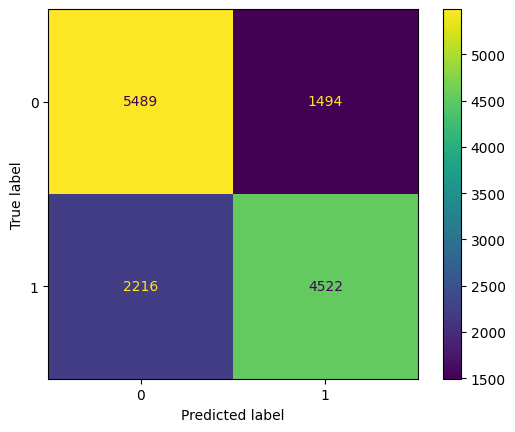

In [24]:
voting_model=VotingClassifier(estimators=[test_1,test_2,test_3,test_4, test_5],voting="hard")
voting_model.fit(x_train,y_train)
y_predict=voting_model.predict(x_test)
cm = confusion_matrix(y_test,y_predict)
ConfusionMatrixDisplay(cm).plot()

In [25]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.71      0.79      0.75      6983
           1       0.75      0.67      0.71      6738

    accuracy                           0.73     13721
   macro avg       0.73      0.73      0.73     13721
weighted avg       0.73      0.73      0.73     13721



## conclusion

In summary, the outcome of this study was predicted due to the hard nature of the problem. Predicting cardiovascular disease through a simple AI-model, a more sophistcated and complex model is essential for the issue. With an accuracy rate around 73%, the model is not ready for clinical use, where precision is vital.

When it comes to applying AI in healthcare, caution is key. A slight error can have serious consequences on a person's health. Therefore, it is essential that the aim for an AI system that is extremely reliable. The question of who is responsible if the AI makes a wrong call is also important, especially in a healthcare setting.

Looking ahead, improving the AI will involve collecting better data and continuously upgrading the system's programming. We also need to put in place strong rules about how AI is used in healthcare, to ensure the safety and trust of patients relying on this technology.